# Notebook to analyse the X-ray scans as well as the labels

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import cv2

In [2]:
folder = '/home/olli/Projects/Kaggle/Vesuvius/Data/train'

## There are 3 scans available with a label; plot them all in one

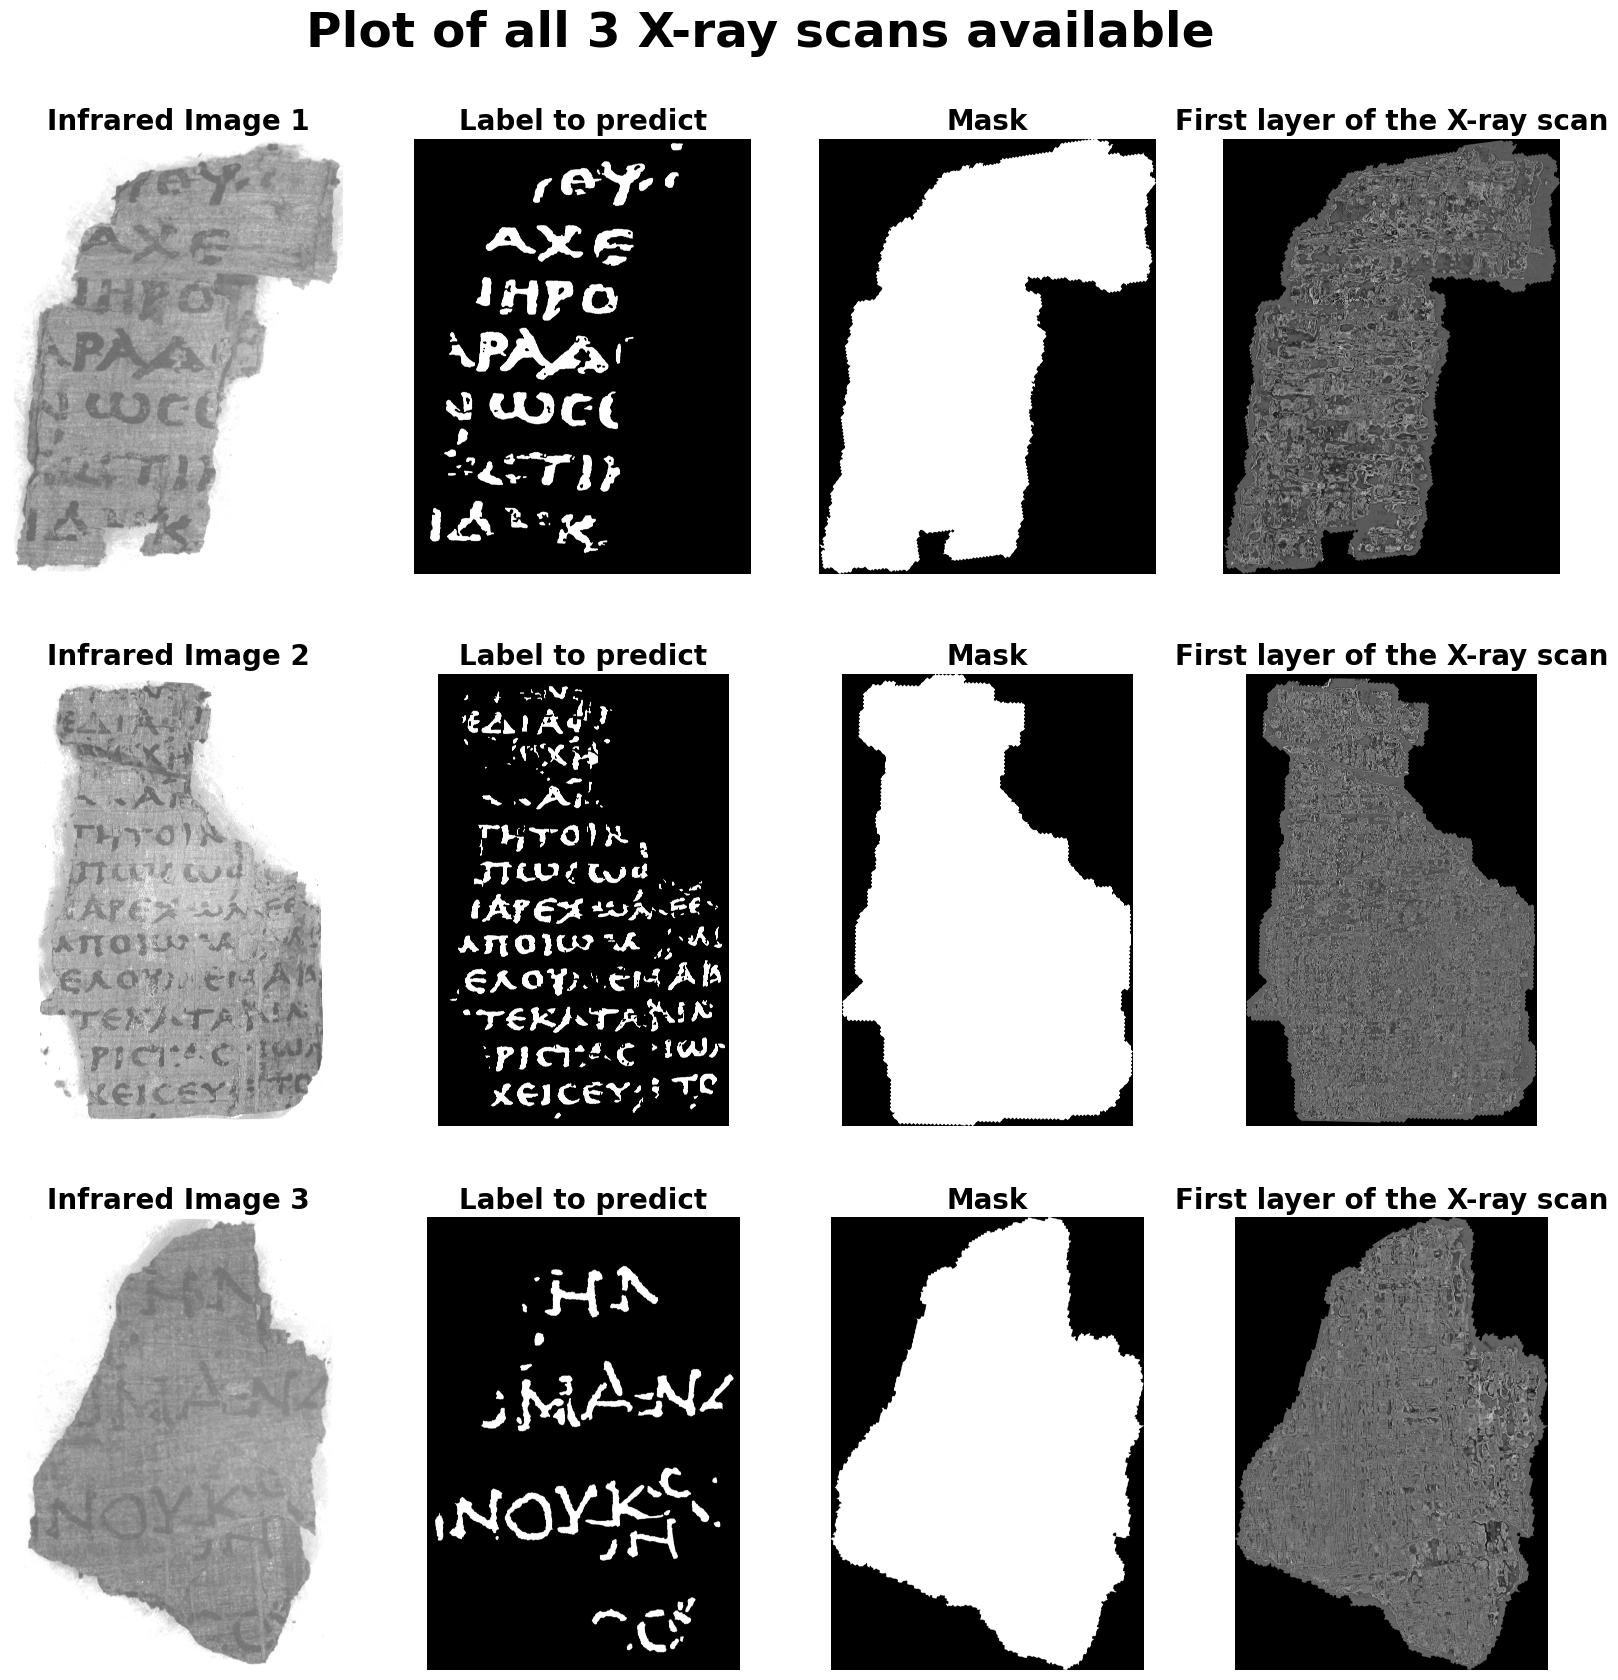

In [3]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))

for scan in range(1, 4):
    scan_folder = os.path.join(folder, str(scan))
    scan_ir_path = os.path.join(scan_folder, 'ir.png')
    scan_label_path = os.path.join(scan_folder, 'inklabels.png')
    scan_mask_path = os.path.join(scan_folder, 'mask.png')
    scan_exp_path = os.path.join(scan_folder, 'surface_volume', '00.tif')
    
    ir = cv2.imread(scan_ir_path)
    label = cv2.imread(scan_label_path)
    mask = cv2.imread(scan_mask_path)
    exp = cv2.imread(scan_exp_path)
    
    row = scan - 1
    
    ax[row, 0].imshow(ir)
    ax[row, 0].set_title(f'Infrared Image {scan}', fontsize=20, fontweight='bold')
    ax[row, 0].axis('off')
    
    ax[row, 1].imshow(label)
    ax[row, 1].set_title('Label to predict', fontsize=20, fontweight='bold')
    ax[row, 1].axis('off')
    
    ax[row, 2].imshow(mask)
    ax[row, 2].set_title('Mask', fontsize=20, fontweight='bold')
    ax[row, 2].axis('off')
    
    ax[row, 3].imshow(exp)
    ax[row, 3].set_title('First layer of the X-ray scan', fontsize=20, fontweight='bold')
    ax[row, 3].axis('off')
    
path_save_all = '/home/olli/Projects/Kaggle/Vesuvius/Figures/Plot_All_Scans.png'
    
fig.suptitle('Plot of all 3 X-ray scans available', fontsize=35, fontweight='bold', y=0.94)
fig.savefig(path_save_all, bbox_inches='tight')

# Check the size (resolution) of each scan

In [4]:
for scan in range(1, 4):
    scan_path = os.path.join(folder, str(scan), 'surface_volume', '00.tif')
    img = cv2.imread(scan_path, cmap='gray')
    print(f'Size of scan {scan}: {img.shape}')

Size of scan 1: (8181, 6330, 3)
Size of scan 2: (14830, 9506, 3)
Size of scan 3: (7606, 5249, 3)


### These are huge scans, smaller chunks will  be needed for training

## The scans in the right are only the first layer; Check how many there are for each scan

In [5]:
for scan in range(1, 4):
    scans_path = os.path.join(folder, str(scan), 'surface_volume')
    num_scans = len(glob(scans_path + '/*.tif'))
    print(f'Scan {scan} has {num_scans} scans.')

Scan 1 has 65 scans.
Scan 2 has 65 scans.
Scan 3 has 65 scans.


# Now check if the depth has an impact on the information stored in them

In [6]:
check = list(range(0, 65, 13))
check.append(64)
check

[0, 13, 26, 39, 52, 64]

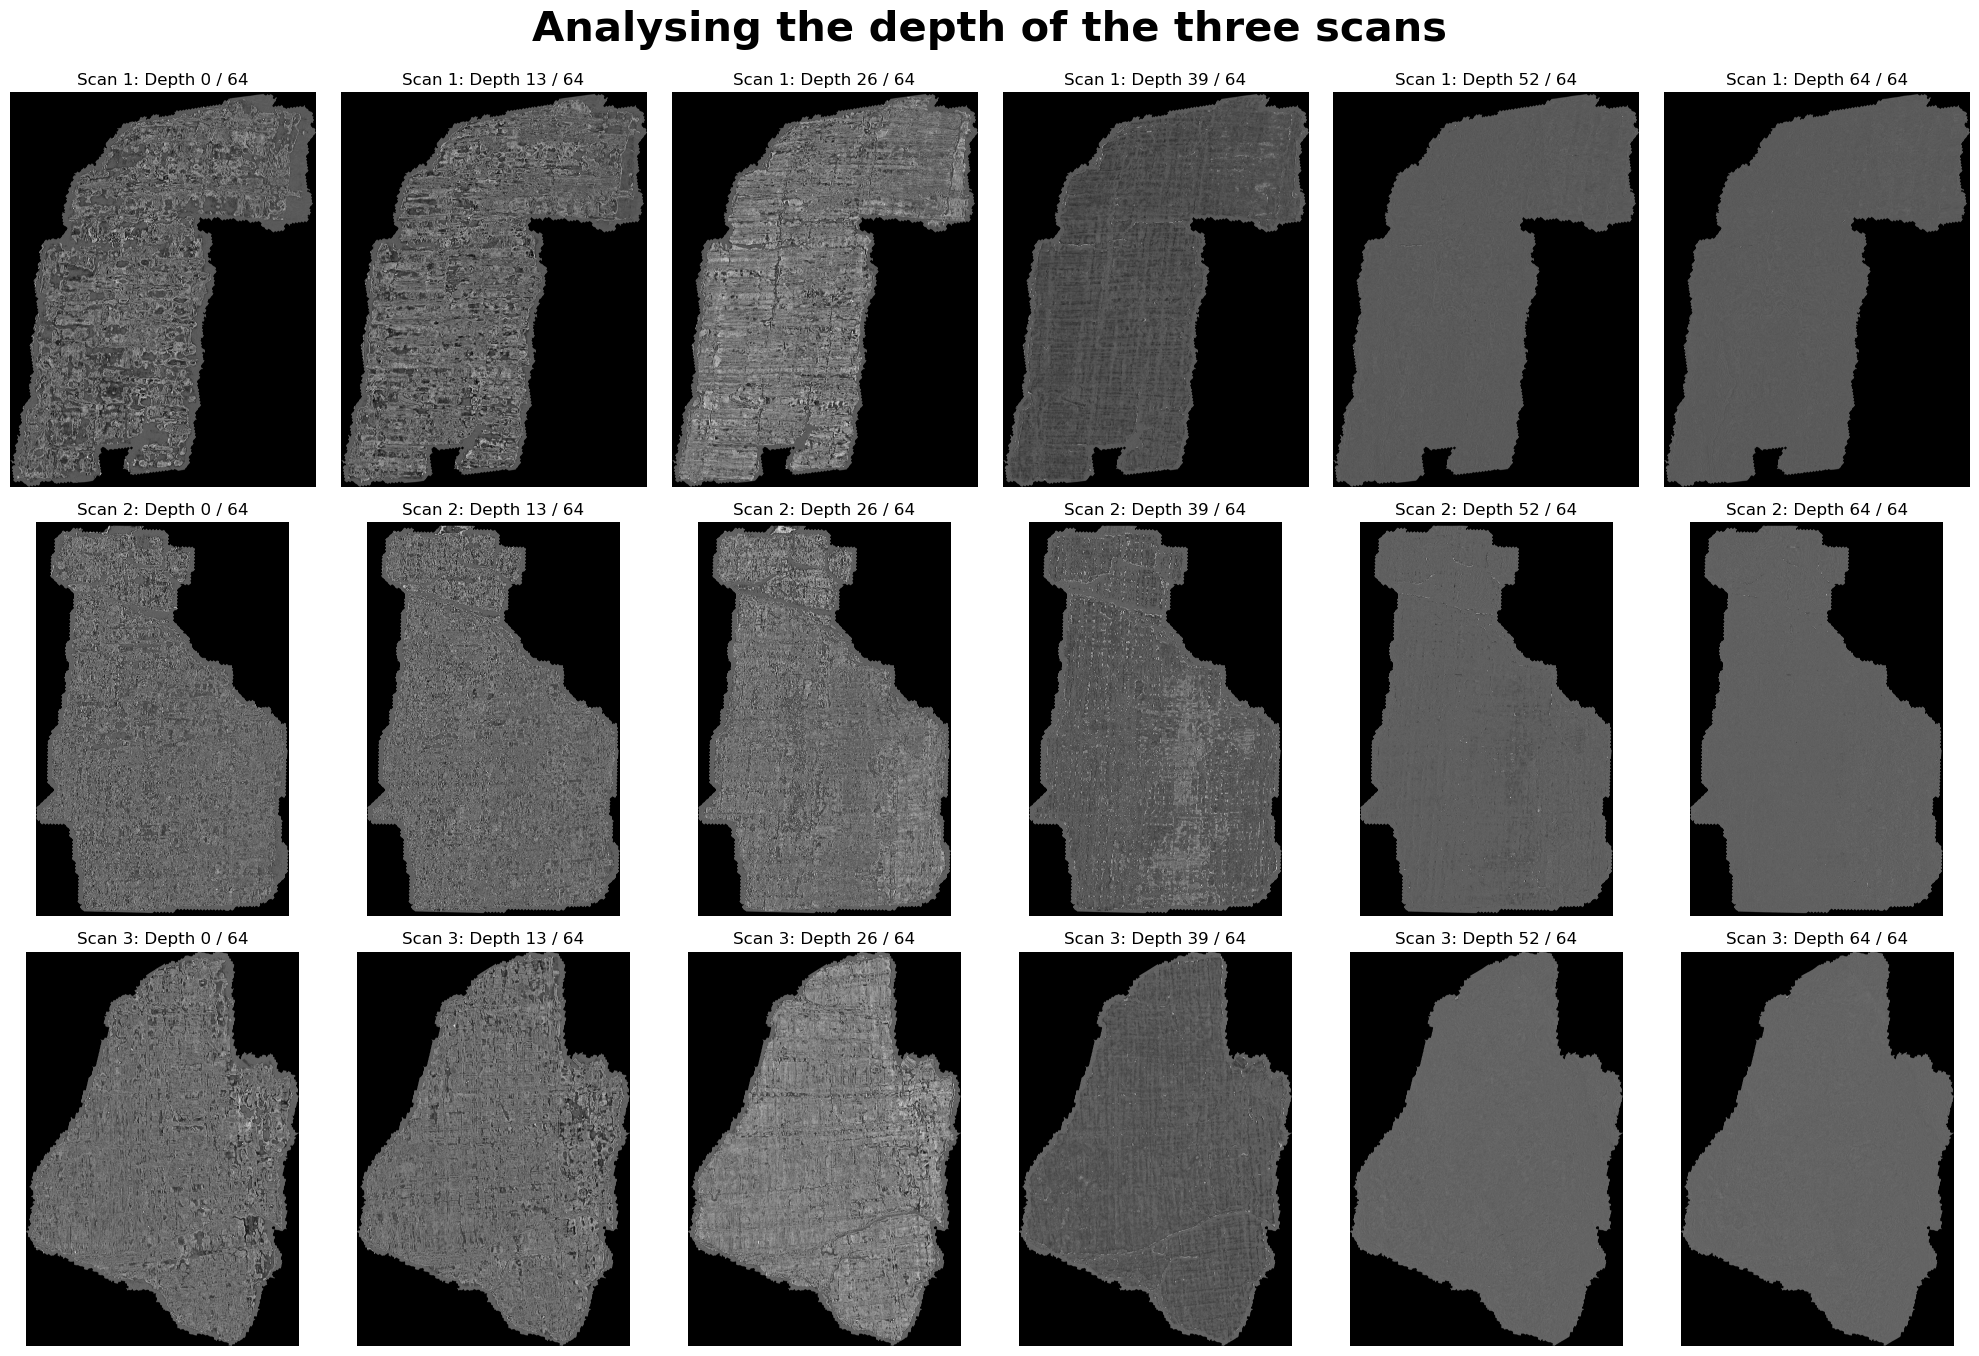

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20, 13))

for scan in range(1, 4):
    row = scan - 1
    scans_path = os.path.join(folder, str(scan), 'surface_volume')
    scans = glob(scans_path + '/*tif')
    scans.sort()
    
    # plot every 13. depth of a scan in one row
    for index, num in enumerate(check):  # index for col assignment
        path_scan = scans[num]
        scan_check = cv2.imread(path_scan)
        ax[row, index].imshow(scan_check)
        ax[row, index].set_title(f'Scan {scan}: Depth {num} / 64')
        ax[row, index].axis('off')

fig.tight_layout()

path_save_depth = '/home/olli/Projects/Kaggle/Vesuvius/Figures/Depth_Analysis.png'

fig.suptitle('Analysing the depth of the three scans', fontsize=30, fontweight='bold', y=1.04)
fig.savefig(path_save_depth, bbox_inches='tight')
plt.show()

### As can be seen, the deeper regions probably do not contain any / much ink!

# Finally analyse the values of the scans

In [8]:
paths_scan_1 = glob(folder + '/1/surface_volume/*.tif')
paths_scan_2 = glob(folder + '/2/surface_volume/*.tif')
paths_scan_3 = glob(folder + '/3/surface_volume/*.tif')

In [9]:
# sort them in an ascending order to loop over in parallel
paths_scan_1.sort()
paths_scan_2.sort()
paths_scan_3.sort()

In [10]:
for one, two, three in zip(paths_scan_1, paths_scan_2, paths_scan_3):
    scan_one = cv2.imread(one, cv2.IMREAD_GRAYSCALE)
    scan_two = cv2.imread(two, cv2.IMREAD_GRAYSCALE)
    scan_three = cv2.imread(three, cv2.IMREAD_GRAYSCALE)
    
    name = one.split('/')[-1].split('.')[0]
    
    #calculate the min/max values
    scan_one_min = scan_one.min()
    scan_one_max = scan_one.max()
    
    scan_two_min = scan_two.min()
    scan_two_max = scan_two.max()
    
    scan_three_min = scan_three.min()
    scan_three_max = scan_three.max()
    
    print(f'Name {name}:   Scan 1 - Min: {scan_one_min}, Max: {scan_one_max}; ', end='')
    print(f'Scan 2 - Min: {scan_two_min}, Max: {scan_two_max}; ', end='')
    print(f'Scan 3 - Min: {scan_three_min}, Max: {scan_three_max}')

Name 00:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 01:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 02:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 03:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 04:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 05:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 06:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 07:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 08:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 09:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255
Name 10:   Scan 1 - Min: 0, Max: 255; Scan 2 - Min: 0, Max: 255; Scan 3 - Min: 0, Max: 255

### Scan 1 and 3 have smaller max pixels in the last layers